In [1]:
%load_ext autoreload
%autoreload 2

In [95]:
import tensorflow as tf
import gym
import numpy as np
import model
import man_controller
import matplotlib.pyplot as plt
from utils import *
from future_model import *
from ae import *

In [3]:
env = gym.make("FetchPickAndPlace-v1")

/home/norman/anaconda3/envs/mjc-no-gpu/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [7]:

def get_experience(eps, env):
    states, actions = [], []
    for ep in range(eps):
        state = env.reset()
        new_states, new_acts = man_controller.get_demo(env, state, True)
        states+=new_states
        actions+=new_acts

    return states, actions

In [8]:
states, actions = get_experience(200, env)

In [18]:
obs_dim, act_dim = len(states[0]), len(actions[0])
obs_dim, act_dim

(31, 4)

In [15]:
states, actions, next_states = np.array(states[:-1]), np.array(actions[:-1]), np.array(states[1:])

In [17]:
norm = Normalizer(len(states[0]), len(actions[0])).fit(states, actions, next_states)

5136


(35, 32)
(32, 32)
(32, 31)
states shape (5136, 31)
acts shape (5136, 4)
delta states shape (5136, 31)
states mean shape (1, 31) (1, 31)
acts mean shape (1, 4) (1, 4)
delta_states mean shape (1, 31) (1, 31)
train indices shape (4622,)
eval indices shape (514,)


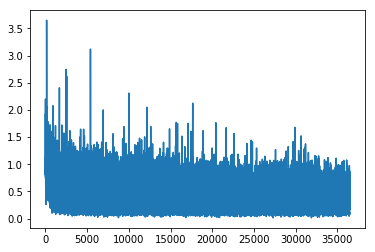

tf.Tensor(0.35704955610985645, shape=(), dtype=float64)
tf.Tensor(0.3683032808881379, shape=(), dtype=float64)
tf.Tensor(0.49096814563137514, shape=(), dtype=float64)
tf.Tensor(0.29998434499060433, shape=(), dtype=float64)
tf.Tensor(0.43192603833596427, shape=(), dtype=float64)
tf.Tensor(0.3850655786202909, shape=(), dtype=float64)
tf.Tensor(0.7181432430017904, shape=(), dtype=float64)
tf.Tensor(0.3315530724814884, shape=(), dtype=float64)
tf.Tensor(0.8222806951655789, shape=(), dtype=float64)
Validation average loss 0.4672526616916763


In [64]:
dyn = NNDynamicsModel(obs_dim, act_dim, 32, norm, 64, 500, 3e-4)
dyn.fit({"states": states, "acts" : actions, "next_states" : next_states}, plot = True)

In [75]:
predicted_states = np.array(dyn.unroll(states[10], actions[10:20]))
real_states = np.array(next_states[10:20])

In [76]:
real_states.shape

(10, 31)

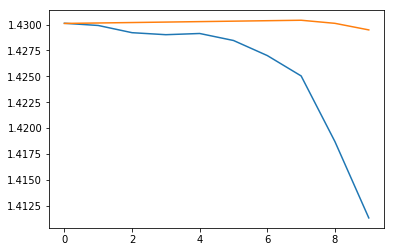

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


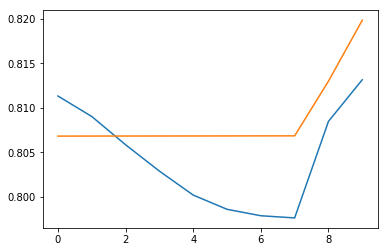

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


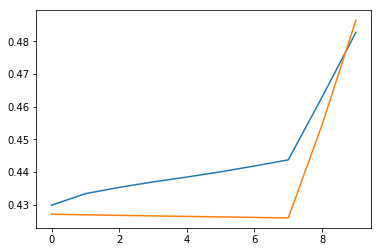

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


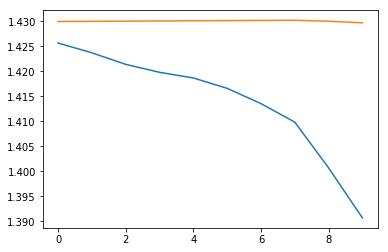

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


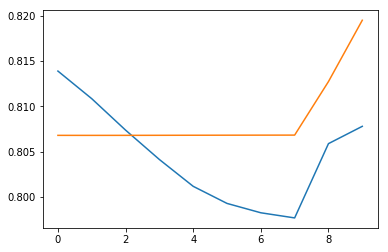

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


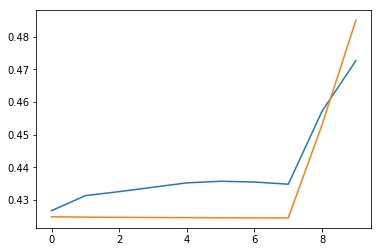

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


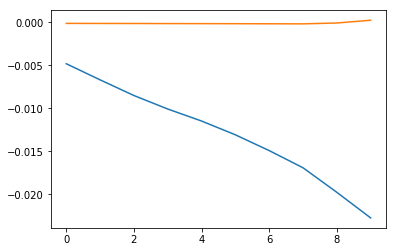

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


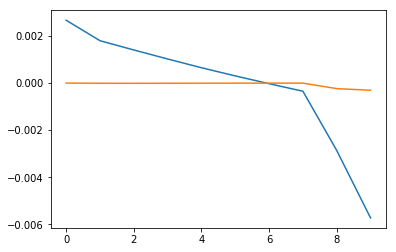

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


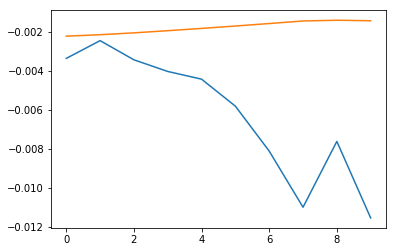

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


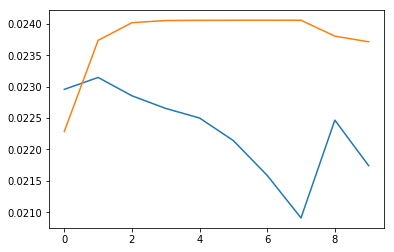

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


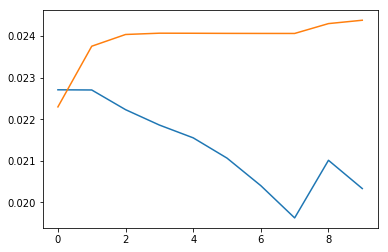

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


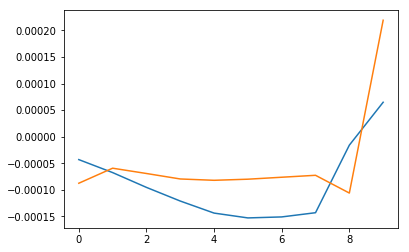

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


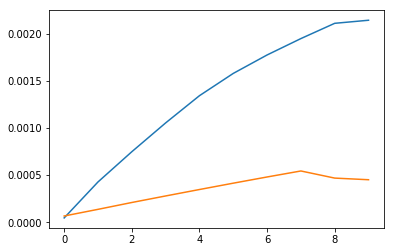

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


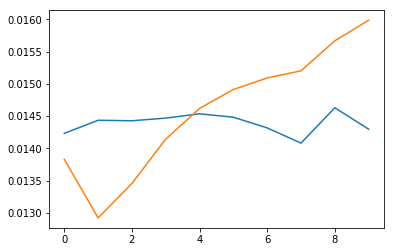

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


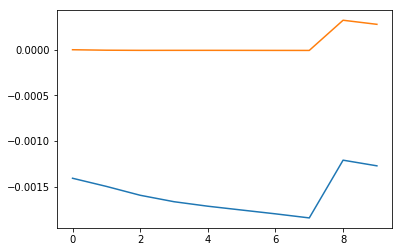

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


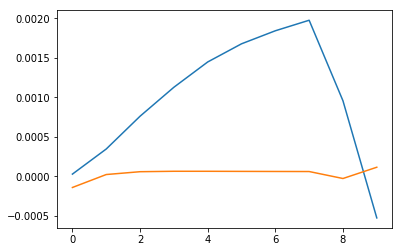

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


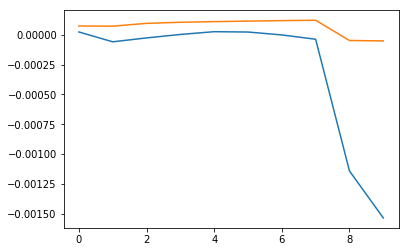

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


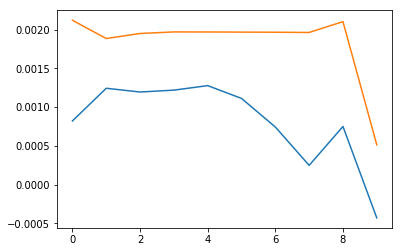

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


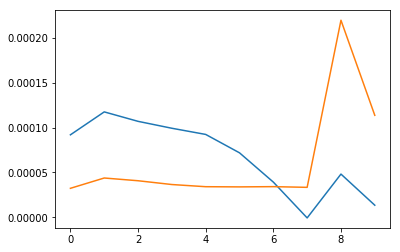

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


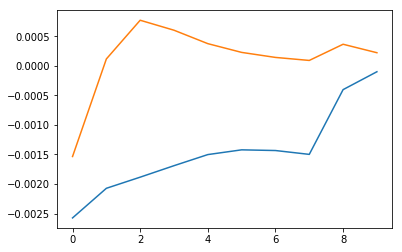

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


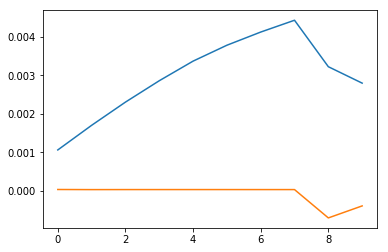

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


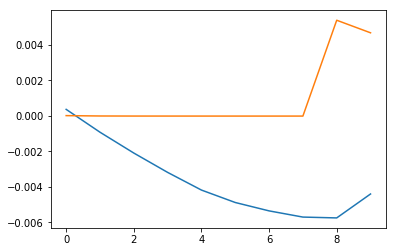

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


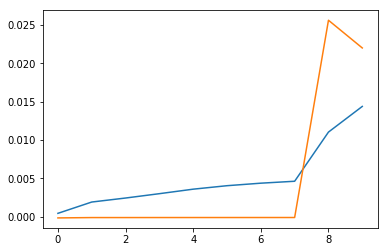

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


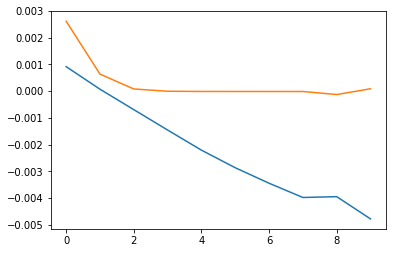

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


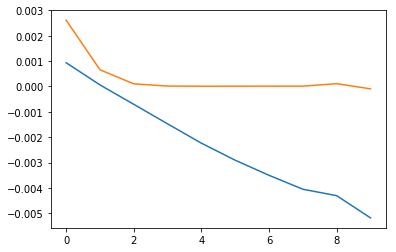

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


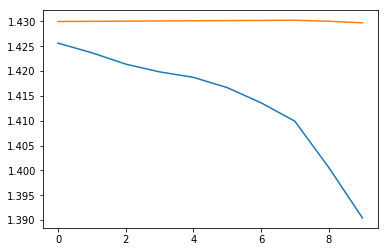

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


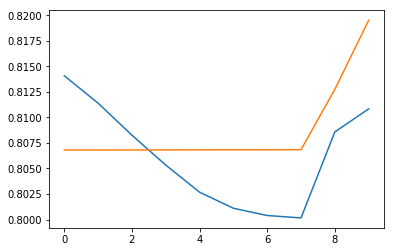

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


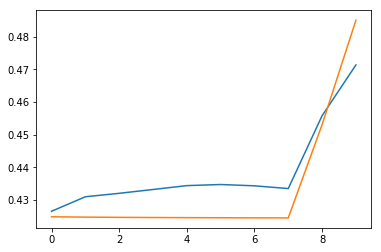

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


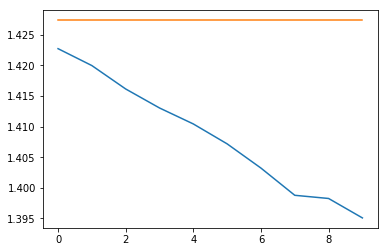

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


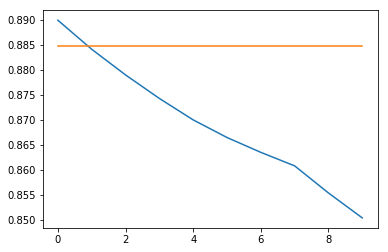

tf.Tensor(0.00013937140498130772, shape=(), dtype=float64)


In [77]:
for i in range(30):
    plt.plot(predicted_states[:,0,i])
    plt.plot(real_states[:,i])
    plt.show()
    print(tf.reduce_mean(tf.losses.mse(predicted_states, real_states)))

In [68]:
new_states, new_actions = get_experience(200, env)

In [78]:
new_states, new_actions, new_next_states = np.array(new_states[:-1]), np.array(new_actions[:-1]), np.array(new_states[1:])

In [79]:
predicted_states = np.array(dyn.unroll(new_states[10], new_actions[10:20]))
real_states = np.array(new_next_states[10:20])

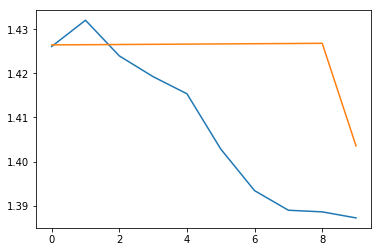

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


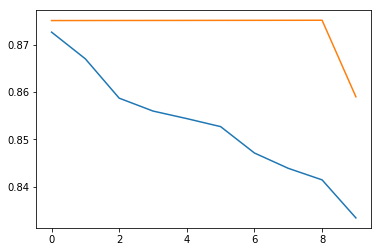

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


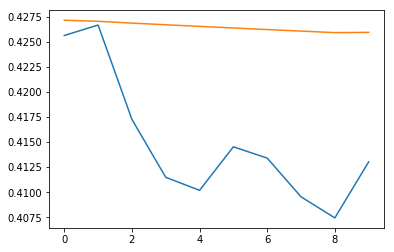

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


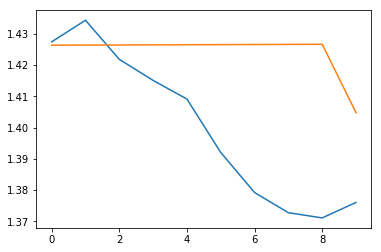

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


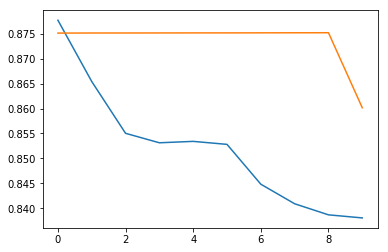

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


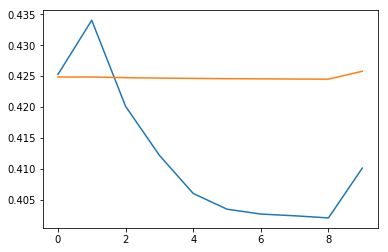

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


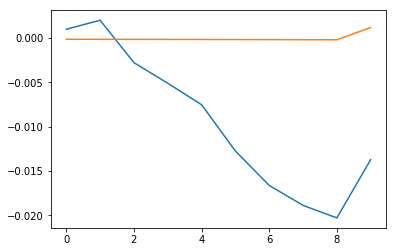

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


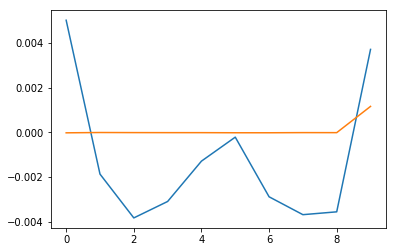

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


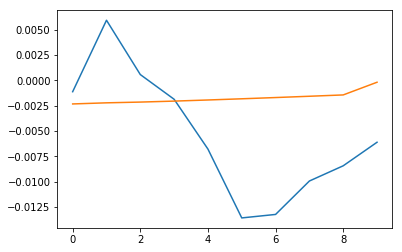

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


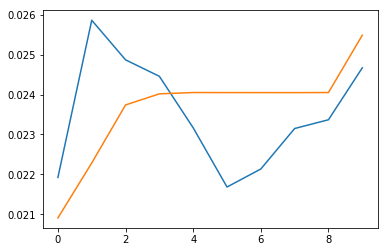

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


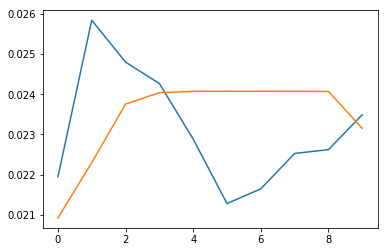

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


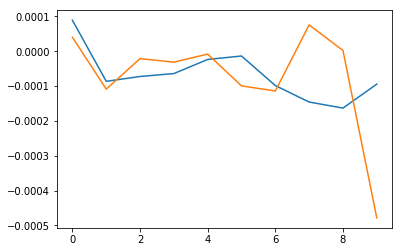

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


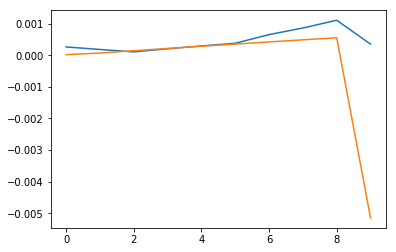

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


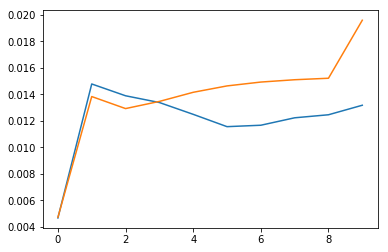

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


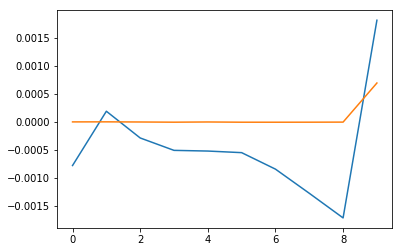

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


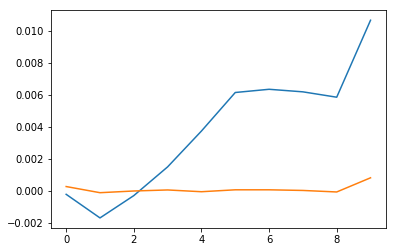

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


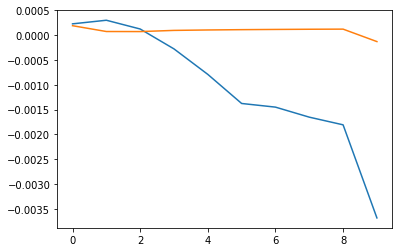

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


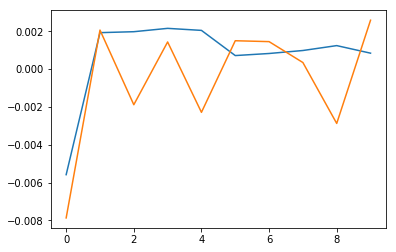

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


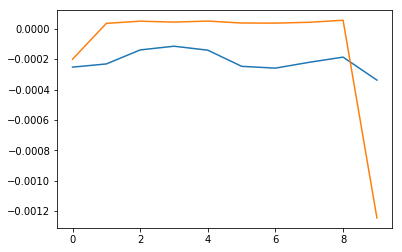

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


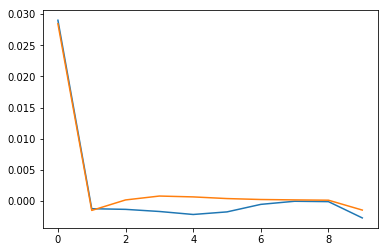

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


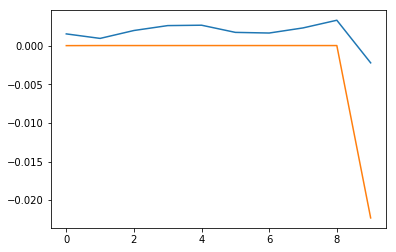

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


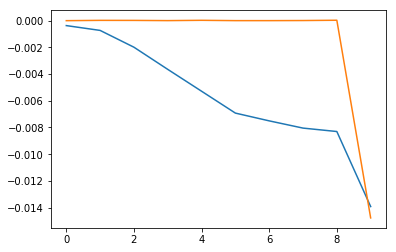

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


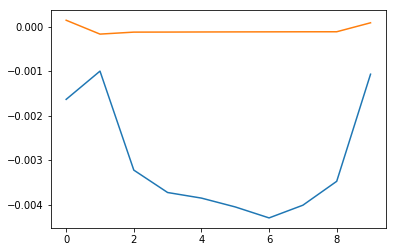

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


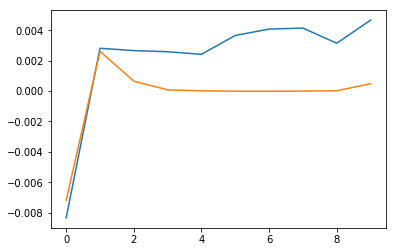

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


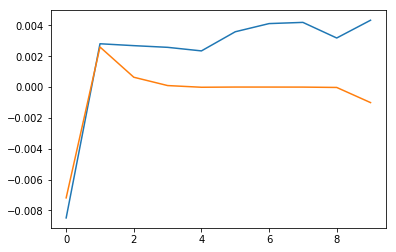

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


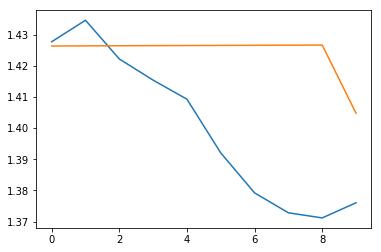

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


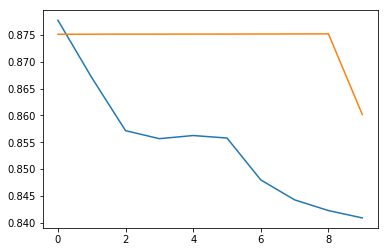

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


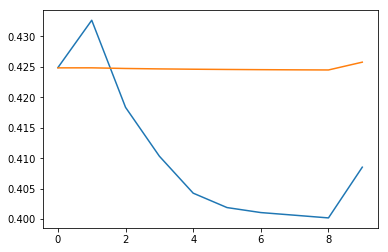

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


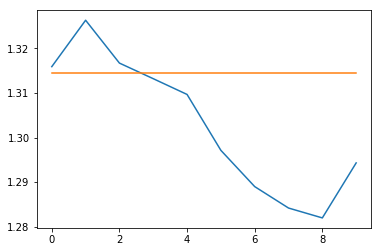

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


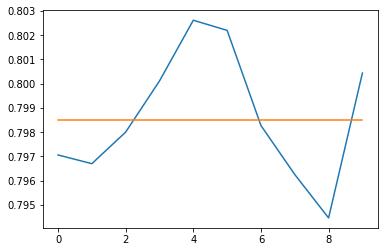

tf.Tensor(0.00022972050003921982, shape=(), dtype=float64)


In [80]:
for i in range(30):
    plt.plot(predicted_states[:,0,i])
    plt.plot(real_states[:,i])
    plt.show()
    print(tf.reduce_mean(tf.losses.mse(predicted_states, real_states)))

In [89]:
bc = model.BCModelDropout(obs_dim, act_dim, 128, 2, 1e-3)

In [90]:
bc.train(states, actions, 32, 50)

In [93]:
bc.error(states[10][None,:])

0.6082481257191977

In [147]:
ae = FutureUnc(bc, dyn, bc)

In [165]:
ae.error(new_states[500][None,:], steps = 20)

0.9657163082343979